In [2]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#importing data
train = pd.read_csv("/Users/damacm1143/Downloads/training.csv")

In [4]:
test = pd.read_csv("/Users/damacm1143/Downloads/test.csv")


In [5]:

train.isnull().sum() 

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [6]:

test.isnull().sum() 

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [7]:
train['TransactionStartTime']=pd.to_datetime(train['TransactionStartTime'])

train['year'] = pd.to_datetime(train.TransactionStartTime).dt.year
train['month'] = pd.to_datetime(train.TransactionStartTime).dt.month
train['day'] = pd.to_datetime(train.TransactionStartTime).dt.day
train['hour'] = pd.to_datetime(train.TransactionStartTime).dt.hour
train['minute'] = pd.to_datetime(train.TransactionStartTime).dt.minute
train['day'] = pd.to_datetime(train.TransactionStartTime).dt.dayofweek


In [8]:
test['TransactionStartTime']=pd.to_datetime(test['TransactionStartTime'])

test['year'] = pd.to_datetime(test.TransactionStartTime).dt.year
test['month'] = pd.to_datetime(test.TransactionStartTime).dt.month
test['day'] = pd.to_datetime(test.TransactionStartTime).dt.day
test['hour'] = pd.to_datetime(test.TransactionStartTime).dt.hour
test['minute'] = pd.to_datetime(test.TransactionStartTime).dt.minute
test['day'] = pd.to_datetime(test.TransactionStartTime).dt.dayofweek

In [9]:
!pip install sqlalchemy

In [10]:
data = train["FraudResult"].value_counts()
data

FraudResult
0    95469
1      193
Name: count, dtype: int64

In [11]:
data1 = train.groupby('FraudResult')["Value"].sum()
data1

FraudResult
0    645678490
1    301431171
Name: Value, dtype: int64

In [12]:
# Encoding the columns

from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 

train['ProductCategory']= label_encoder.fit_transform(train['ProductCategory'])

In [13]:
test['ProductCategory']= label_encoder.fit_transform(test['ProductCategory'])


In [14]:
train['TransactionId'] = train['TransactionId'].str.replace('TransactionId_', '')
train['TransactionId']= train['TransactionId'].astype(int)

train['AccountId']=train['AccountId'].str.replace('AccountId_', '')
train['AccountId']=train['AccountId'].astype(int)

train['BatchId']= train['BatchId'].str.replace('BatchId_','')
train['BatchId']=train['BatchId'].astype(int)

train['SubscriptionId']=train['SubscriptionId'].str.replace('SubscriptionId_', '')
train['SubscriptionId']=train['SubscriptionId'].astype(int)

train['CustomerId']=train['CustomerId'].str.replace('CustomerId_','')
train['CustomerId']=train['CustomerId'].astype(int)

train['ProviderId']=train['ProviderId'].str.replace('ProviderId_','')
train['ChannelId']=train['ChannelId'].str.replace('ChannelId_','')
train['ProductId']=train['ProductId'].str.replace('ProductId_','')

train['ProviderId']=train['ProviderId'].astype(int)
train['ChannelId']=train['ChannelId'].astype(int)
train['ProductId']=train['ProductId'].astype(int)

In [15]:
test.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [16]:
for col in test.columns:
    if test[col].dtype == 'object' and col not in ['TransactionId']:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test[col].values.astype('str')))
        test[col] = lbl.fit_transform(list(test[col].values.astype('str')))

BatchId
AccountId
SubscriptionId
CustomerId
CurrencyCode
ProviderId
ProductId
ChannelId


In [17]:
Y = train['FraudResult']
X = train.drop(columns=['FraudResult','TransactionId','CountryCode','TransactionStartTime','CurrencyCode','Value','BatchId', 'ProviderId', 'SubscriptionId']) 

In [18]:
x_test2 = test.drop(columns=['TransactionId','CountryCode','TransactionStartTime','CurrencyCode', 'Value','BatchId', 'ProviderId', 'SubscriptionId']) 

In [19]:
X.columns

Index(['AccountId', 'CustomerId', 'ProductId', 'ProductCategory', 'ChannelId',
       'Amount', 'PricingStrategy', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


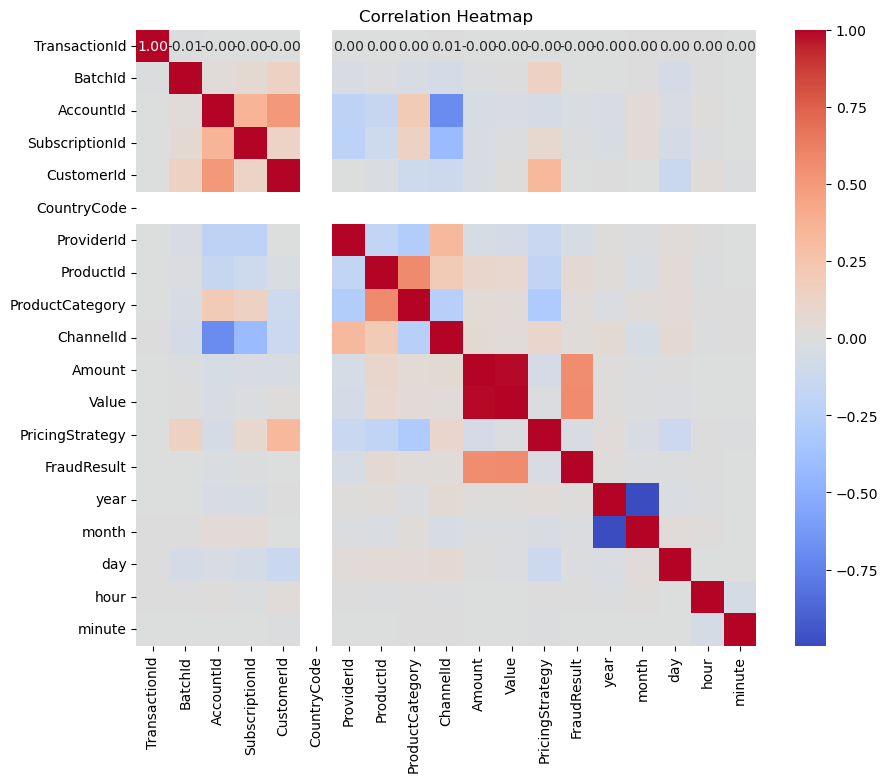

In [20]:
def plot_correlation_matrix(training, figsize=(10, 8)):
    numeric_data = train.select_dtypes(include=[np.number])  
    corr = numeric_data.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation_matrix(train, figsize=(10, 8))

In [21]:
from sklearn.feature_selection import VarianceThreshold

v_thresh = VarianceThreshold(threshold= 0.95)
v_thresh.fit(X)
v_thresh.get_support()

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True])

In [22]:
!pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# define oversampling strategy
# The code snippet you provided is using the RandomOverSampler from the imbalanced-learn library to perform oversampling on the dataset.
# sample = RandomOverSampler(sampling_strategy='minority')
# X_train_over, Y_train_over = sample.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=23)


In [24]:
X.columns

Index(['AccountId', 'CustomerId', 'ProductId', 'ProductCategory', 'ChannelId',
       'Amount', 'PricingStrategy', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [25]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,Y_train)

RandomForestClassifier()

In [26]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(X,Y)

In [27]:
y_predict=random.predict(X_test)

In [28]:
# predictions = pd.DataFrame(y_predict, columns = ['FraudResult'])

In [29]:
# id = test['TransactionId']
# id

In [30]:
# zindi = pd.concat((id,predictions ),axis=1)

In [31]:
# zindi.to_csv("/Users/damacm1143/Downloads/pre22.csv", index=False)


In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, y_predict)
print(conf_matrix)

[[19091     5]
 [    4    33]]


In [33]:
labels = ['0: Not Fraud', '1: Fraud']

pd.DataFrame(data=confusion_matrix(Y_test, y_predict), index=labels, columns=labels)

,0: Not Fraud,1: Fraud
0: Not Fraud,19091,5
1: Fraud,4,33


In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19096
           1       0.87      0.89      0.88        37

    accuracy                           1.00     19133
   macro avg       0.93      0.95      0.94     19133
weighted avg       1.00      1.00      1.00     19133



In [35]:
import pickle

model_save_path = "Fraud_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(random,file)

In [36]:
X_train.columns

Index(['AccountId', 'CustomerId', 'ProductId', 'ProductCategory', 'ChannelId',
       'Amount', 'PricingStrategy', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [37]:
X_test.columns

Index(['AccountId', 'CustomerId', 'ProductId', 'ProductCategory', 'ChannelId',
       'Amount', 'PricingStrategy', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')